In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### Load & Normalize

In [2]:
X = pd.read_csv('Linear_X_Train.csv')
Y = pd.read_csv('Linear_Y_Train.csv')
X.head()

,x
0,-0.289307
1,-0.588810
2,1.027507
3,-0.259013
4,0.782043


In [3]:
X = X.values
Y = Y.values

# Normalise
u = X.mean()
std = X.std()
X = (X-u)/std

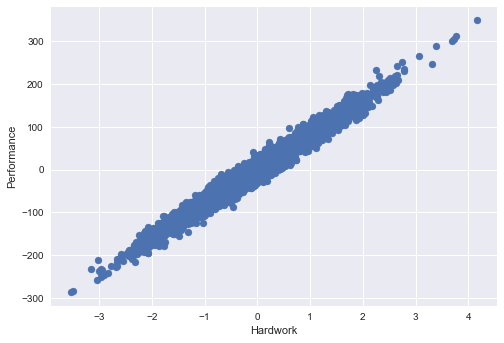

((3750, 1), (3750, 1))

In [4]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()
X.shape, Y.shape

### Linear Regression

In [18]:
def hypothesis(x, theta):
    #theta = [theta0, theta1]
    y_ = theta[0] + theta[1]*x
    return y_

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    
    for i in range(m):
        x = X[i]
        y = Y[i]
        y_ = hypothesis(x, theta)
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
    return grad/m

def gradDescent(X,Y, max_steps = 100, learning_rate=0.1):
    theta = np.zeros((2,))
    error_list = []
    theta_list = []
    
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = eRR(X,Y,theta)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
        theta_list.append((theta[0], theta[1]))
        error_list.append(e)
        
    return theta, error_list, theta_list

def eRR(X,Y,theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        total_error += (y_ - Y[i])**2
    return total_error/m


In [19]:
theta, error_list, theta_list = gradDescent(X,Y)

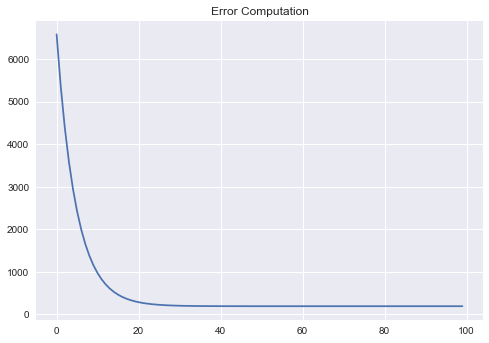

In [7]:
plt.plot(error_list)
plt.title('Error Computation')
plt.show()

### Predictions and Best Line

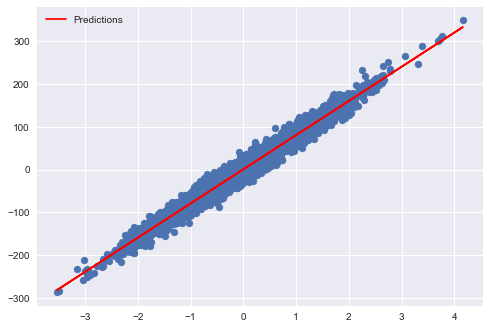

In [8]:
y_ = hypothesis(X,theta)
plt.scatter(X,Y)
plt.plot(X,y_,color='red', label='Predictions')
plt.legend()
plt.show()

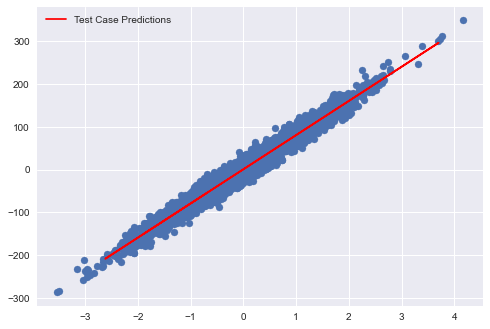

In [9]:
X_test = pd.read_csv('Linear_X_Test.csv')
Y_test = hypothesis(X_test, theta)
plt.scatter(X,Y)
plt.plot(X_test,Y_test,color='red', label='Test Case Predictions')
plt.legend()
plt.show()

In [10]:
df = pd.DataFrame(Y_test)
df2 = df.rename(columns = {'x': 'y'})
df2.to_csv('predictions.csv', index=False)

### Computing Score
- R2 (R-Squared) or Coefficient of Determination

In [11]:
def r2_score(Y,Y_):
    num = np.sum((Y-Y_)**2)
    den = np.sum((Y-Y.mean())**2)
    score = (1- num/den)
    return score*100

In [12]:
r2_score(Y,y_)

97.09612226971643

### Visualising Functions

In [13]:
from mpl_toolkits.mplot3d import Axes3D

In [14]:
theta

array([ 0.6838508 , 79.90361453])

In [23]:
# Loss Function
T0 = np.arange(-40,40,1)
T1 = np.arange(40,120,1)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)

for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_ = T1[i,j]*X + T0[i,j]
        J[i,j] = np.sum((Y-y_)**2)/Y.shape[0]

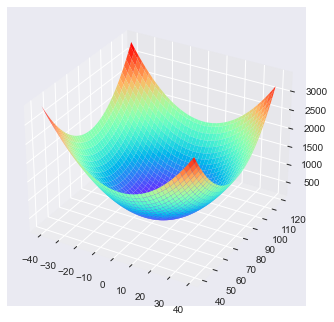

In [24]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

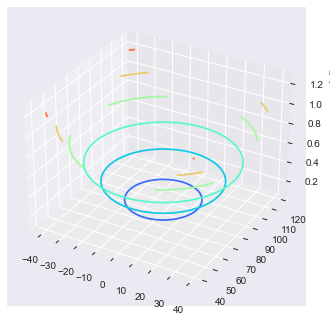

In [17]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

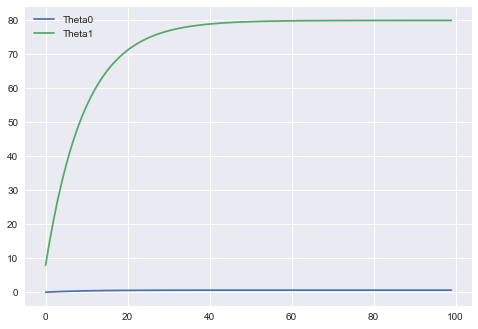

In [21]:
# Theta Updates
theta_list = np.array(theta_list)
plt.plot(theta_list[:,0], label='Theta0')
plt.plot(theta_list[:,1], label='Theta1')
plt.legend()
plt.show()

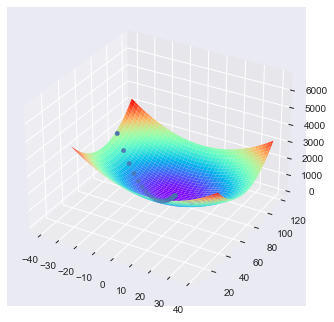

In [28]:
# Theta Updates in Loss Function
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

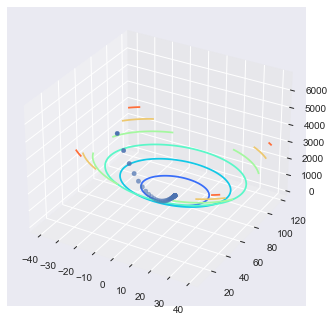

In [30]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1], error_list)
plt.show()

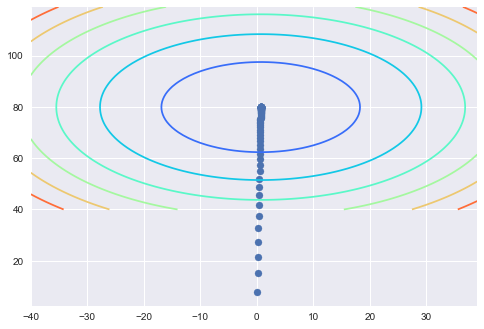

In [31]:
plt.contour(T0,T1,J,cmap='rainbow')
plt.scatter(theta_list[:,0], theta_list[:,1])
plt.show()